## Analysis Includes:
1. **Outlier Analysis Table + Boxplots + Histograms**
2. **Fraud vs Non-Fraud Distribution (Graph + Table)**
3. **Merchant Category Distribution (Graph + Table)**
4. **Foreign Transaction & Location Mismatch Analysis**
5. **Correlation Heatmap + Table**

## Setup and Load Data

In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set figure quality
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [23]:
# Load cleaned data
filepath = 'Cleaned_Data/credit_card_fraud_10k_cleaned.csv'

df = pd.read_csv(filepath)
print(f"✓ Loaded {len(df):,} records")
print(f"✓ Features: {len(df.columns)}")
print("\n" + "="*80)
print("DATA LOADED SUCCESSFULLY")
print("="*80)

✓ Loaded 9,999 records
✓ Features: 10

DATA LOADED SUCCESSFULLY


---
# 1️⃣ OUTLIER ANALYSIS with BOXPLOTS & HISTOGRAMS
## 1.1 Outlier Statistics Table

In [24]:
print("\n" + "="*80)
print("1. OUTLIER ANALYSIS - COMPREHENSIVE TABLE")
print("="*80)

numerical_features = ['amount', 'transaction_hour', 'device_trust_score', 
                     'velocity_last_24h', 'cardholder_age']

outlier_data = []

for feature in numerical_features:
    # Calculate statistics
    min_val = df[feature].min()
    max_val = df[feature].max()
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_data.append({
        'Feature': feature,
        'Min': min_val,
        'Max': max_val,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers (Count)': outlier_count,
        'Outliers (%)': outlier_pct
    })

outlier_table = pd.DataFrame(outlier_data)
print("\n" + outlier_table.to_string(index=False))
print("\n" + "="*80)


1. OUTLIER ANALYSIS - COMPREHENSIVE TABLE

           Feature   Min     Max    Q1     Q3    IQR  Lower Bound  Upper Bound  Outliers (Count)  Outliers (%)
            amount  0.01 1471.04 50.91 242.55 191.64      -236.54       530.00               501          5.01
  transaction_hour  0.00   23.00  6.00  18.00  12.00       -12.00        36.00                 0          0.00
device_trust_score 25.00   99.00 43.00  80.00  37.00       -12.50       135.50                 0          0.00
 velocity_last_24h  0.00    9.00  1.00   3.00   2.00        -2.00         6.00                51          0.51
    cardholder_age 18.00   69.00 30.00  56.00  26.00        -9.00        95.00                 0          0.00



## 1.2 Boxplots for All Features


📊 Generating Boxplots...


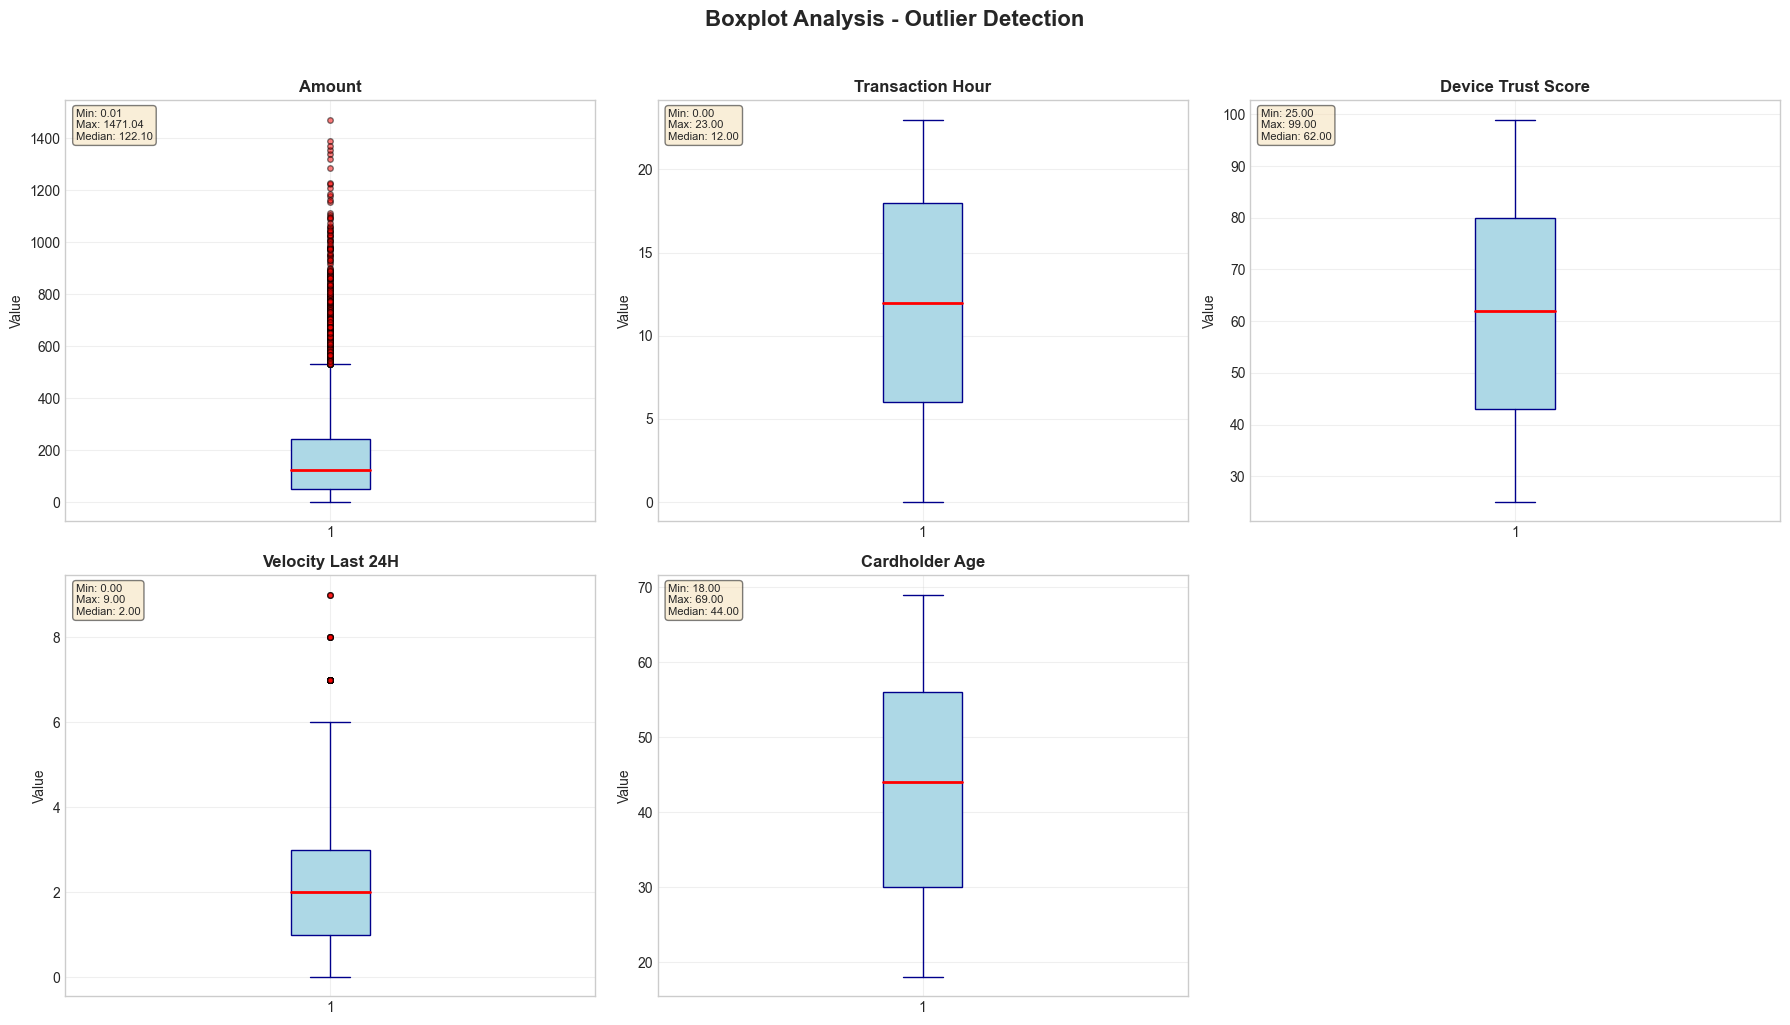

✓ Boxplots generated


In [25]:
print("\n📊 Generating Boxplots...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplot Analysis - Outlier Detection', fontsize=16, fontweight='bold', y=1.02)
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    ax = axes[idx]
    
    # Create boxplot
    bp = ax.boxplot(df[feature], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='darkblue'),
                    whiskerprops=dict(color='darkblue'),
                    capprops=dict(color='darkblue'),
                    medianprops=dict(color='red', linewidth=2),
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))
    
    # Add title and labels
    ax.set_title(f'{feature.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Add statistics text
    stats_text = f"Min: {df[feature].min():.2f}\nMax: {df[feature].max():.2f}\nMedian: {df[feature].median():.2f}"
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            fontsize=8)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print("✓ Boxplots generated")

## 1.3 Histograms for All Features


📊 Generating Histograms...


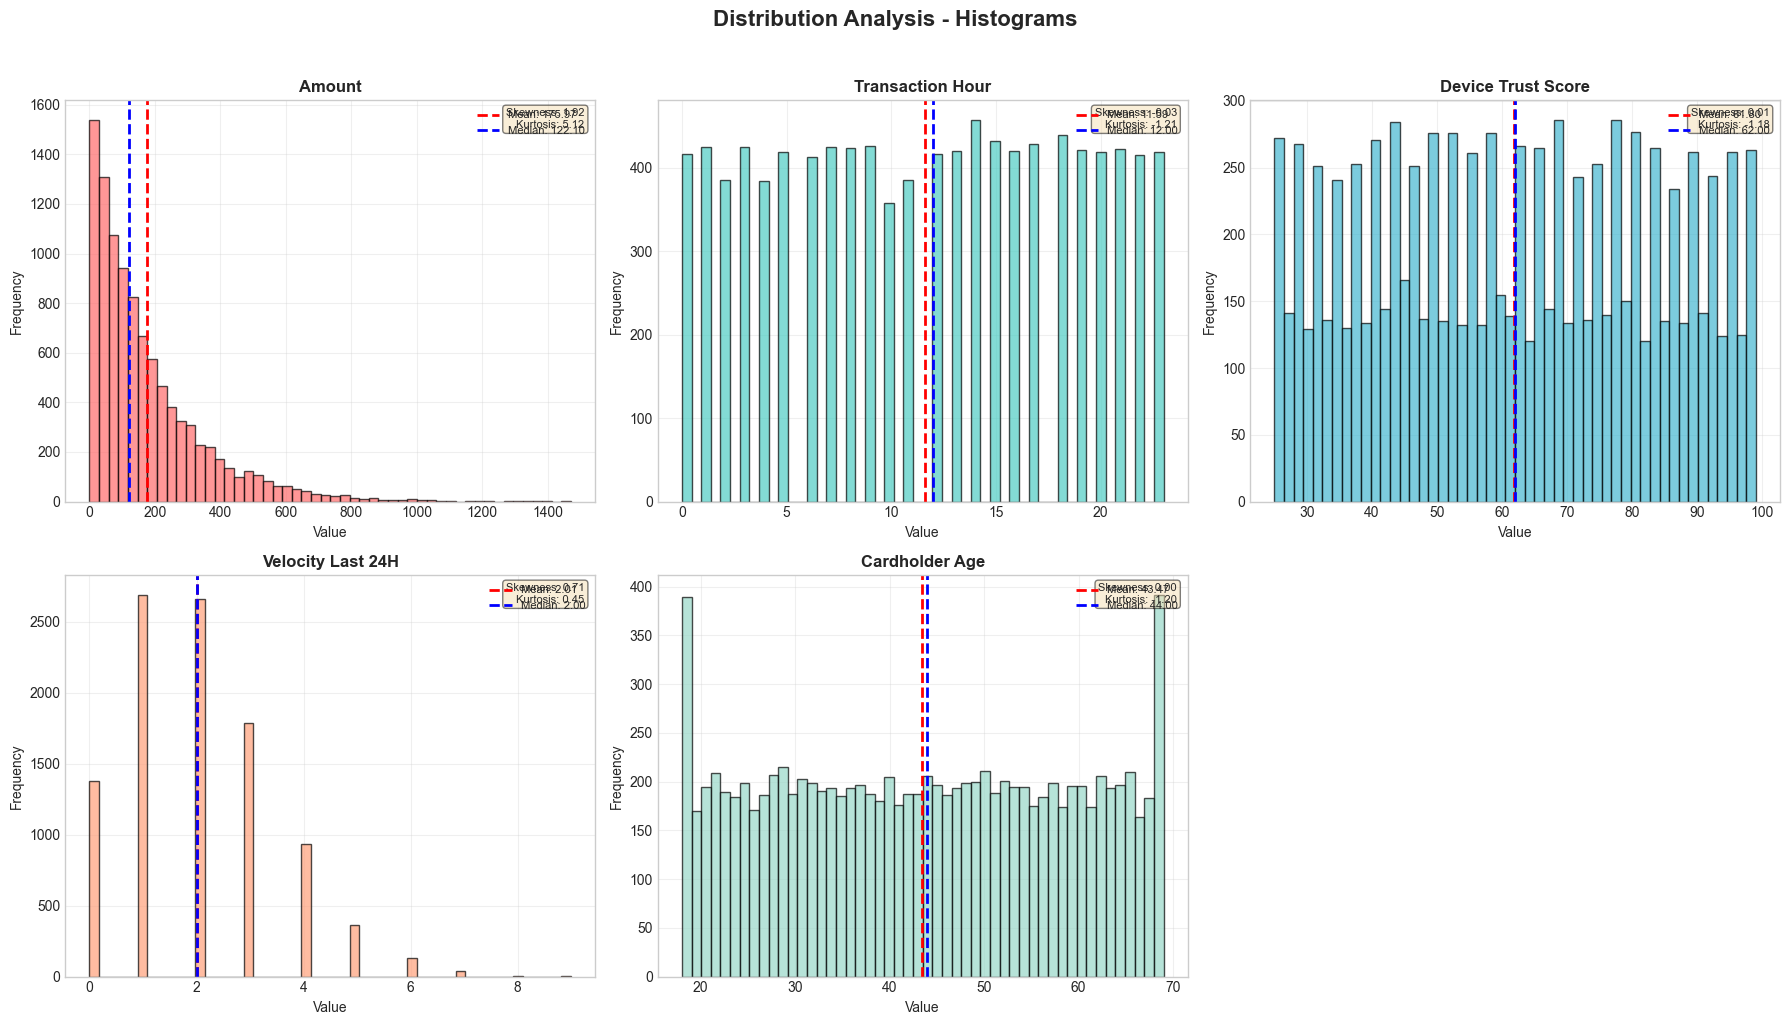

✓ Histograms generated


In [26]:
print("\n📊 Generating Histograms...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution Analysis - Histograms', fontsize=16, fontweight='bold', y=1.02)
axes = axes.flatten()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

for idx, feature in enumerate(numerical_features):
    ax = axes[idx]
    
    # Create histogram
    n, bins, patches = ax.hist(df[feature], bins=50, color=colors[idx], 
                               edgecolor='black', alpha=0.7)
    
    # Add mean and median lines
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    # Add title and labels
    ax.set_title(f'{feature.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)
    
    # Add distribution info
    skew = df[feature].skew()
    kurt = df[feature].kurtosis()
    info_text = f'Skewness: {skew:.2f}\nKurtosis: {kurt:.2f}'
    ax.text(0.98, 0.98, info_text, transform=ax.transAxes, 
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            fontsize=8)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print("✓ Histograms generated")

---
# 2️⃣ FRAUD vs NON-FRAUD DISTRIBUTION
## 2.1 Distribution Table

In [39]:
print("\n" + "="*80)
print("2. FRAUD vs NON-FRAUD DISTRIBUTION")
print("="*80)

# Calculate distribution
fraud_counts = df['is_fraud'].value_counts().sort_index()
fraud_pct = (fraud_counts / len(df) * 100)

# Create distribution table
distribution_data = [
    {
        'Class': 0,
        'Label': 'Legitimate',
        'Count': fraud_counts.get(0, 0),
        'Percentage': fraud_pct.get(0, 0),
        'Ratio': f"{fraud_counts.get(0, 0) / fraud_counts.get(1, 1):.2f}:1" if fraud_counts.get(1, 0) > 0 else 'N/A'
    },
    {
        'Class': 1,
        'Label': 'Fraudulent',
        'Count': fraud_counts.get(1, 0),
        'Percentage': fraud_pct.get(1, 0),
        'Ratio': '1:1'
    },
    {
        'Class': 'Total',
        'Label': 'All Transactions',
        'Count': len(df),
        'Percentage': 100.0,
        'Ratio': '-'
    }
]

fraud_distribution_table = pd.DataFrame(distribution_data)
print("\n" + fraud_distribution_table.to_string(index=False))

# Calculate imbalance ratio
if fraud_counts.get(1, 0) > 0 and fraud_counts.get(0, 0) > 0:
    imbalance_ratio = fraud_counts[0] / fraud_counts[1]
    print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1 (Legitimate:Fraud)")
    
    if imbalance_ratio > 10:
        print("   → HIGH IMBALANCE detected - Consider SMOTE, undersampling, or class weights")
    elif imbalance_ratio > 5:
        print("   → MODERATE IMBALANCE - Monitor model performance carefully")
    else:
        print("   → Acceptable class balance")

print("\n" + "="*80)


2. FRAUD vs NON-FRAUD DISTRIBUTION

Class            Label  Count  Percentage   Ratio
    0       Legitimate   9848       98.49 65.22:1
    1       Fraudulent    151        1.51     1:1
Total All Transactions   9999      100.00       -

Class Imbalance Ratio: 65.22:1 (Legitimate:Fraud)
   → HIGH IMBALANCE detected - Consider SMOTE, undersampling, or class weights



## 2.2 Fraud Distribution Visualizations


📊 Generating Fraud Distribution Graphs...


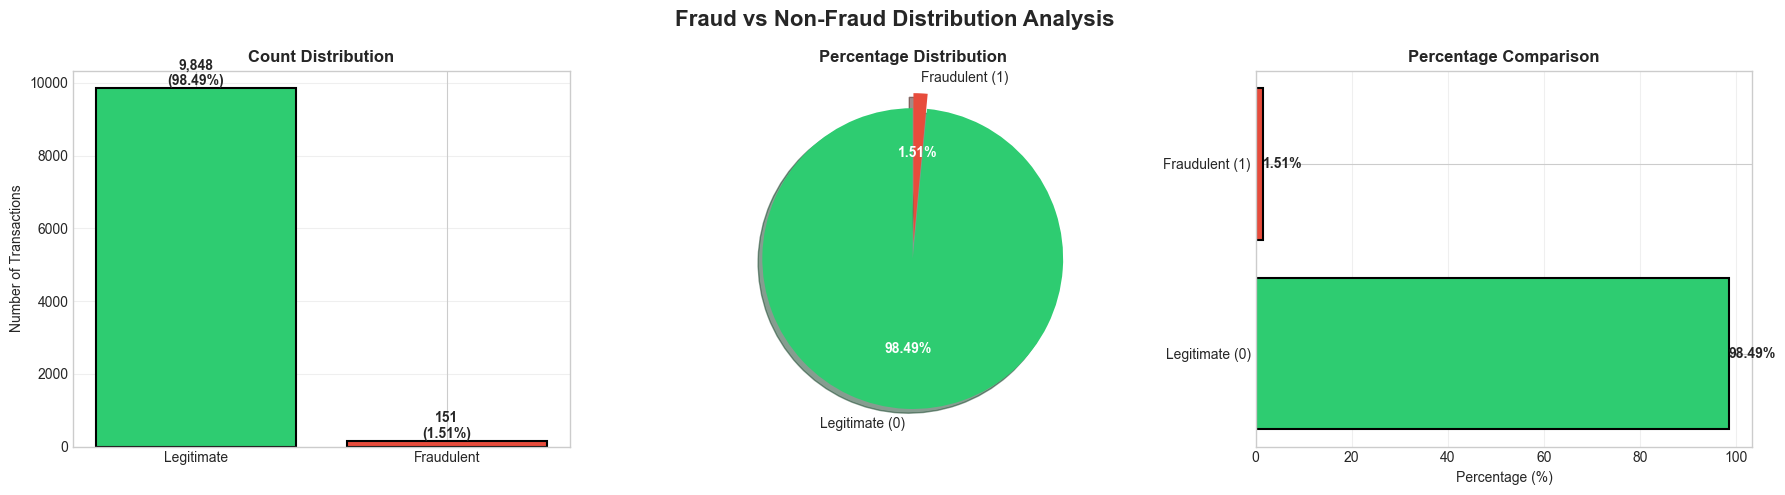

✓ Fraud distribution graphs generated


In [28]:
print("\n📊 Generating Fraud Distribution Graphs...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Fraud vs Non-Fraud Distribution Analysis', fontsize=16, fontweight='bold')

# Color scheme
colors = ['#2ecc71', '#e74c3c']  # Green for legitimate, Red for fraud
labels = ['Legitimate (0)', 'Fraudulent (1)']

# 1. Bar Chart
ax1 = axes[0]
bars = ax1.bar(['Legitimate', 'Fraudulent'], 
               [fraud_counts.get(0, 0), fraud_counts.get(1, 0)],
               color=colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Count Distribution', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Transactions', fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({height/len(df)*100:.2f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Pie Chart
ax2 = axes[1]
wedges, texts, autotexts = ax2.pie([fraud_counts.get(0, 0), fraud_counts.get(1, 0)],
                                    labels=labels,
                                    colors=colors,
                                    autopct='%1.2f%%',
                                    startangle=90,
                                    explode=(0, 0.1),
                                    shadow=True)
ax2.set_title('Percentage Distribution', fontsize=12, fontweight='bold')

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# 3. Horizontal Bar Chart with Percentages
ax3 = axes[2]
y_pos = np.arange(2)
bars = ax3.barh(y_pos, 
                [fraud_pct.get(0, 0), fraud_pct.get(1, 0)],
                color=colors, edgecolor='black', linewidth=1.5)
ax3.set_yticks(y_pos)
ax3.set_yticklabels(labels)
ax3.set_xlabel('Percentage (%)', fontsize=10)
ax3.set_title('Percentage Comparison', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Add percentage labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.2f}%',
            ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Fraud distribution graphs generated")

---
# 3️⃣ MERCHANT CATEGORY DISTRIBUTION
## 3.1 Category Distribution Table

In [29]:
print("\n" + "="*80)
print("3. MERCHANT CATEGORY DISTRIBUTION")
print("="*80)

# Calculate distribution
category_counts = df['merchant_category'].value_counts().sort_values(ascending=False)
category_pct = (category_counts / len(df) * 100)

# Create distribution table
category_data = []
for category in category_counts.index:
    category_data.append({
        'Category': category,
        'Count': category_counts[category],
        'Percentage': category_pct[category]
    })

category_table = pd.DataFrame(category_data)
print("\n" + category_table.to_string(index=False))
print(f"\nTotal Categories: {len(category_counts)}")
print("="*80)


3. MERCHANT CATEGORY DISTRIBUTION

   Category  Count  Percentage
       Food   2093       20.93
   Clothing   2050       20.50
     Travel   1989       19.89
    Grocery   1944       19.44
Electronics   1923       19.23

Total Categories: 5


## 3.2 Merchant Category Visualizations


📊 Generating Merchant Category Graphs...


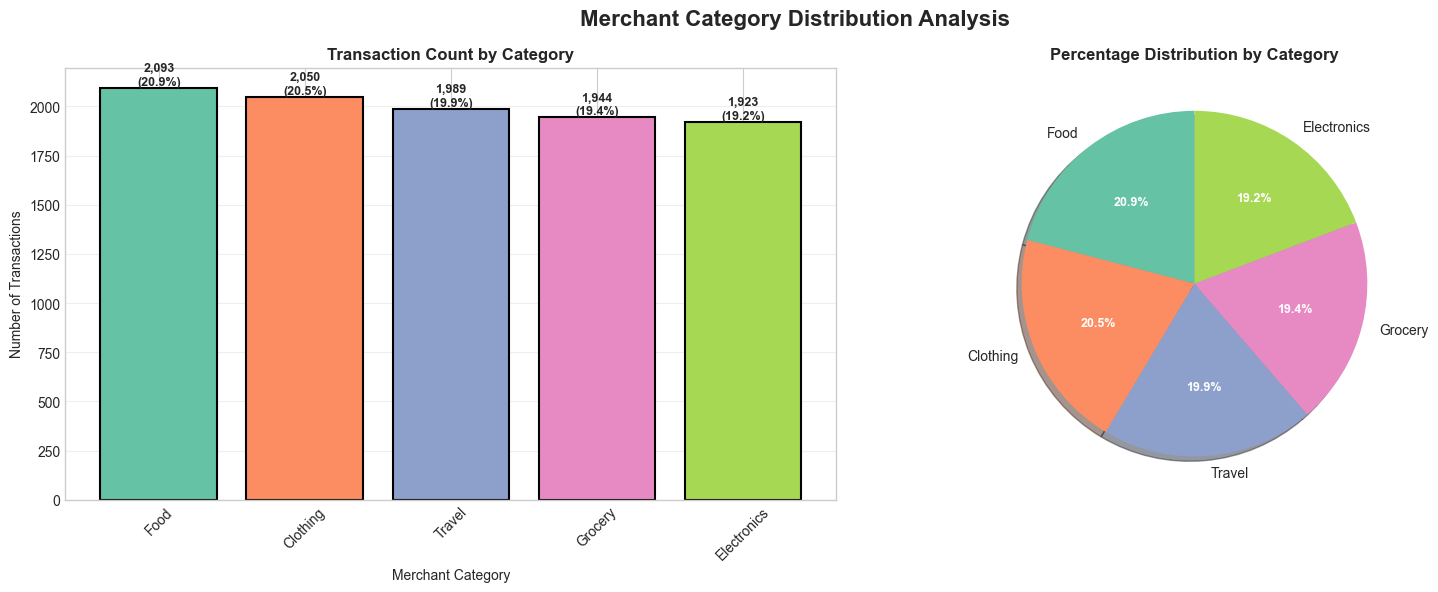

✓ Merchant category graphs generated


In [30]:
print("\n📊 Generating Merchant Category Graphs...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Merchant Category Distribution Analysis', fontsize=16, fontweight='bold')

# Color palette
colors_cat = sns.color_palette('Set2', n_colors=len(category_counts))

# 1. Bar Chart
ax1 = axes[0]
bars = ax1.bar(category_counts.index, category_counts.values, 
               color=colors_cat, edgecolor='black', linewidth=1.5)
ax1.set_title('Transaction Count by Category', fontsize=12, fontweight='bold')
ax1.set_xlabel('Merchant Category', fontsize=10)
ax1.set_ylabel('Number of Transactions', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({height/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Pie Chart
ax2 = axes[1]
wedges, texts, autotexts = ax2.pie(category_counts.values,
                                    labels=category_counts.index,
                                    colors=colors_cat,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    shadow=True)
ax2.set_title('Percentage Distribution by Category', fontsize=12, fontweight='bold')

# Style percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

plt.tight_layout()
plt.show()

print("✓ Merchant category graphs generated")

---
# 4️⃣ FOREIGN TRANSACTION & LOCATION MISMATCH ANALYSIS
## 4.1 Analysis Tables

In [31]:
print("\n" + "="*80)
print("4. FOREIGN TRANSACTION & LOCATION MISMATCH ANALYSIS")
print("="*80)

# Foreign Transaction Analysis
print("\n4.1 FOREIGN TRANSACTION ANALYSIS")
print("-" * 80)

foreign_fraud_analysis = df.groupby('foreign_transaction').agg({
    'is_fraud': ['count', 'sum', 'mean']
}).round(4)

foreign_fraud_analysis.columns = ['Count', 'Fraud Count', 'Fraud Rate']
foreign_fraud_analysis['% Yes'] = foreign_fraud_analysis['Fraud Rate'] * 100
foreign_fraud_analysis.index = ['Class 0 (No)', 'Class 1 (Yes)']

print("\nForeign Transaction vs Fraud:")
print(foreign_fraud_analysis.to_string())

# Location Mismatch Analysis
print("\n\n4.2 LOCATION MISMATCH ANALYSIS")
print("-" * 80)

location_fraud_analysis = df.groupby('location_mismatch').agg({
    'is_fraud': ['count', 'sum', 'mean']
}).round(4)

location_fraud_analysis.columns = ['Count', 'Fraud Count', 'Fraud Rate']
location_fraud_analysis['% Yes'] = location_fraud_analysis['Fraud Rate'] * 100
location_fraud_analysis.index = ['Class 0 (No)', 'Class 1 (Yes)']

print("\nLocation Mismatch vs Fraud:")
print(location_fraud_analysis.to_string())

print("\n" + "="*80)


4. FOREIGN TRANSACTION & LOCATION MISMATCH ANALYSIS

4.1 FOREIGN TRANSACTION ANALYSIS
--------------------------------------------------------------------------------

Foreign Transaction vs Fraud:
               Count  Fraud Count  Fraud Rate  % Yes
Class 0 (No)    9021           69        0.01   0.76
Class 1 (Yes)    978           82        0.08   8.38


4.2 LOCATION MISMATCH ANALYSIS
--------------------------------------------------------------------------------

Location Mismatch vs Fraud:
               Count  Fraud Count  Fraud Rate  % Yes
Class 0 (No)    9142           79        0.01   0.86
Class 1 (Yes)    857           72        0.08   8.40



## 4.2 Risk Factor Visualizations


📊 Generating Risk Factor Graphs...


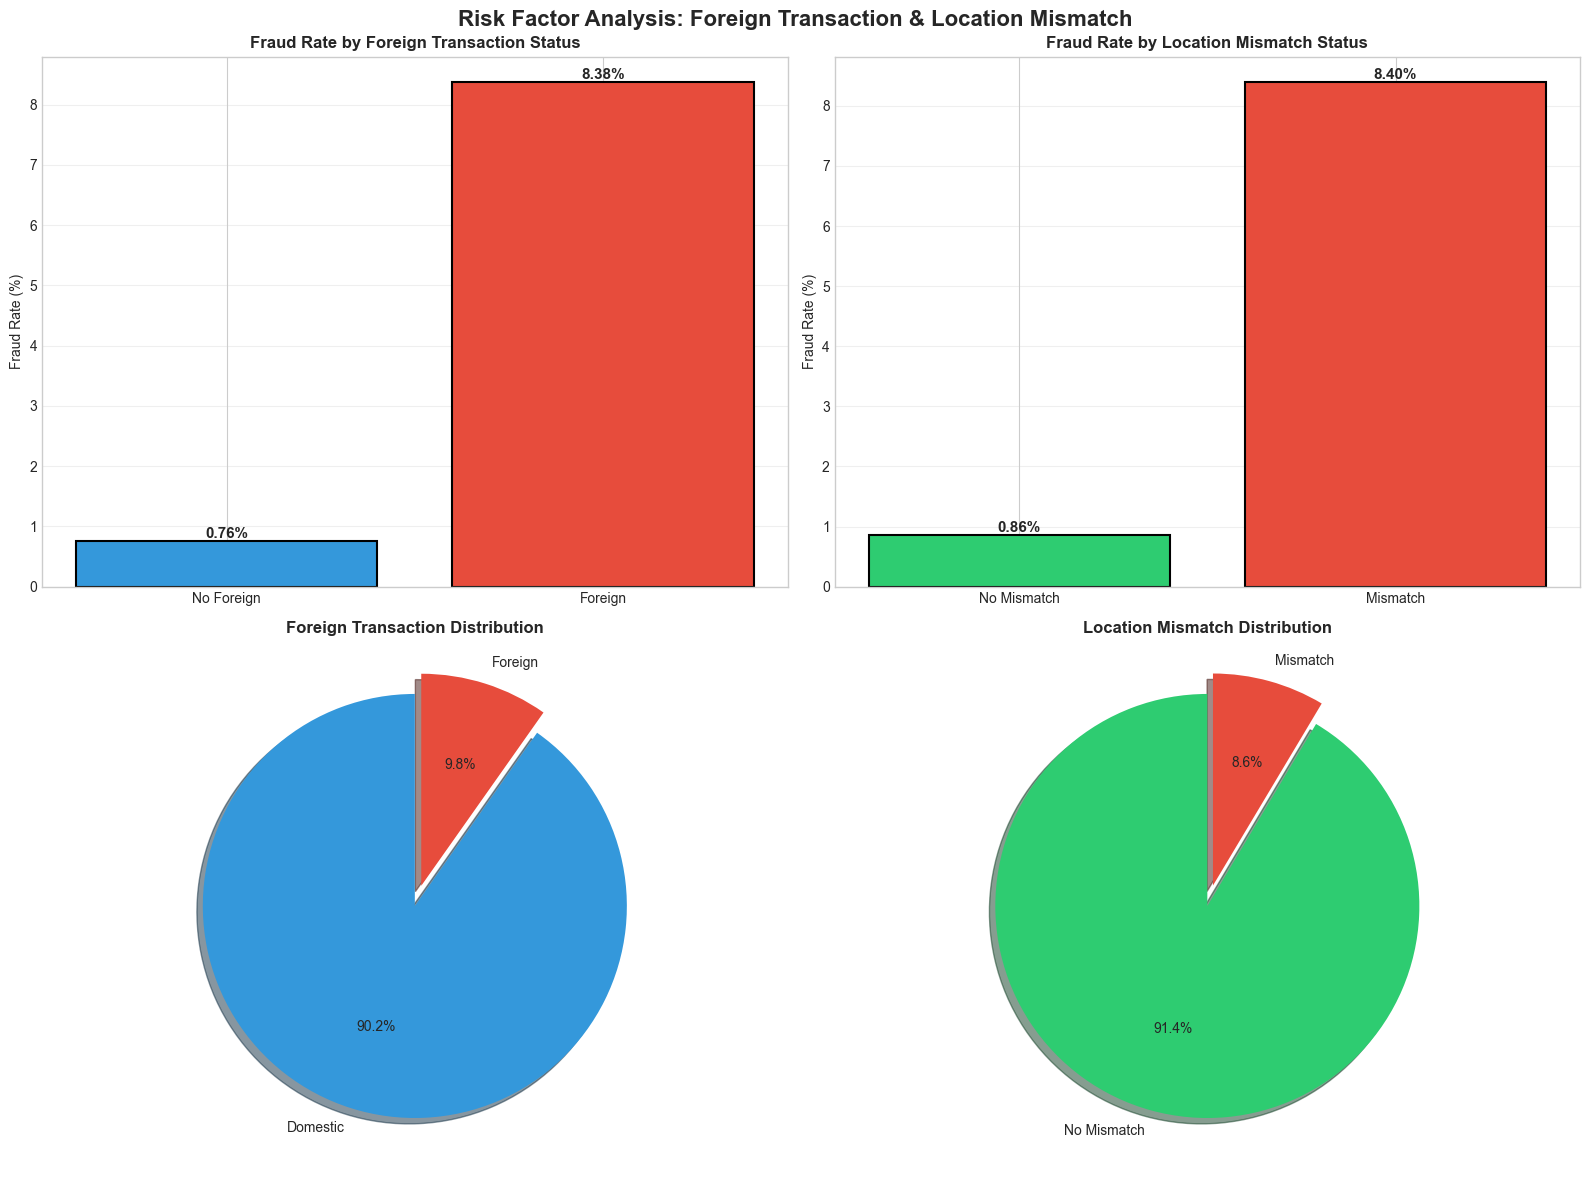

✓ Risk factor graphs generated


In [32]:
print("\n📊 Generating Risk Factor Graphs...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Risk Factor Analysis: Foreign Transaction & Location Mismatch', 
             fontsize=16, fontweight='bold')

# 1. Foreign Transaction - Fraud Rate
ax1 = axes[0, 0]
foreign_data = foreign_fraud_analysis['% Yes'].values
bars = ax1.bar(['No Foreign', 'Foreign'], foreign_data, 
               color=['#3498db', '#e74c3c'], edgecolor='black', linewidth=1.5)
ax1.set_title('Fraud Rate by Foreign Transaction Status', fontsize=12, fontweight='bold')
ax1.set_ylabel('Fraud Rate (%)', fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# 2. Location Mismatch - Fraud Rate
ax2 = axes[0, 1]
location_data = location_fraud_analysis['% Yes'].values
bars = ax2.bar(['No Mismatch', 'Mismatch'], location_data,
               color=['#2ecc71', '#e74c3c'], edgecolor='black', linewidth=1.5)
ax2.set_title('Fraud Rate by Location Mismatch Status', fontsize=12, fontweight='bold')
ax2.set_ylabel('Fraud Rate (%)', fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# 3. Foreign Transaction - Distribution
ax3 = axes[1, 0]
foreign_dist = df['foreign_transaction'].value_counts().sort_index()
ax3.pie(foreign_dist.values, labels=['Domestic', 'Foreign'],
        autopct='%1.1f%%', colors=['#3498db', '#e74c3c'],
        startangle=90, explode=(0, 0.1), shadow=True)
ax3.set_title('Foreign Transaction Distribution', fontsize=12, fontweight='bold')

# 4. Location Mismatch - Distribution
ax4 = axes[1, 1]
location_dist = df['location_mismatch'].value_counts().sort_index()
ax4.pie(location_dist.values, labels=['No Mismatch', 'Mismatch'],
        autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
        startangle=90, explode=(0, 0.1), shadow=True)
ax4.set_title('Location Mismatch Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Risk factor graphs generated")

## 4.3 Combined Risk Factor Analysis


📊 Combined Risk Factor Analysis...

Combined Risk Factors:
                                       Total Count  Fraud Count  Fraud Rate  Fraud %
foreign_transaction location_mismatch                                               
0                   0                         8249           26        0.00     0.32
                    1                          772           43        0.06     5.57
1                   0                          893           53        0.06     5.94
                    1                           85           29        0.34    34.12


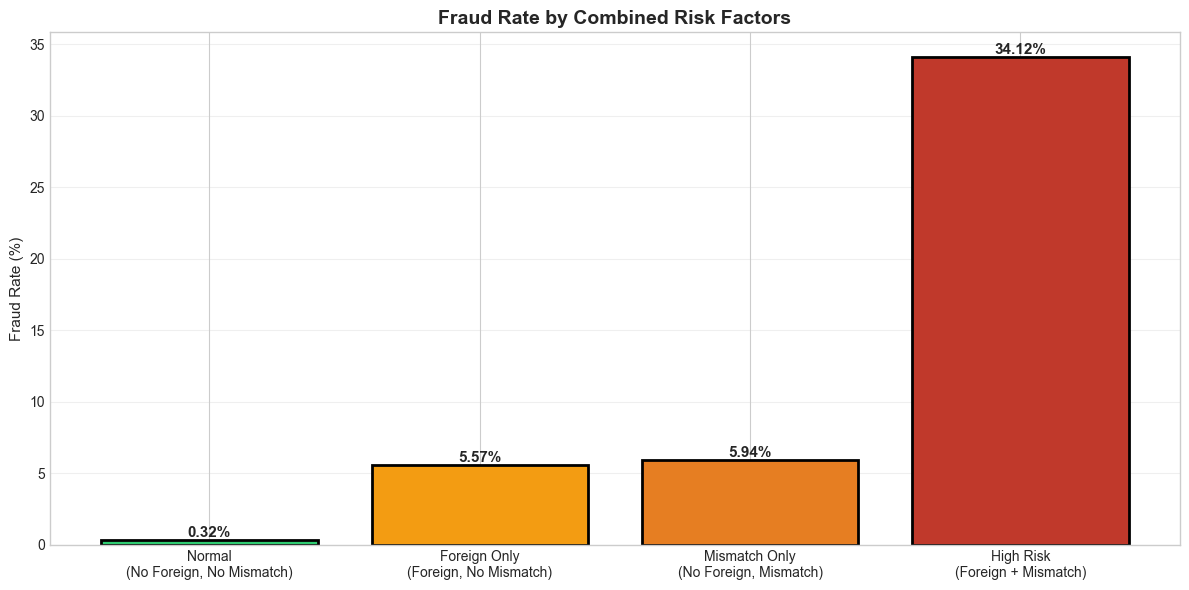

✓ Combined risk analysis completed


In [33]:
print("\n📊 Combined Risk Factor Analysis...")

# Create combined risk factor analysis
risk_combo = df.groupby(['foreign_transaction', 'location_mismatch']).agg({
    'is_fraud': ['count', 'sum', 'mean']
}).round(4)

risk_combo.columns = ['Total Count', 'Fraud Count', 'Fraud Rate']
risk_combo['Fraud %'] = risk_combo['Fraud Rate'] * 100

print("\nCombined Risk Factors:")
print(risk_combo.to_string())

# Visualize combined risk
fig, ax = plt.subplots(figsize=(12, 6))

risk_labels = [
    'Normal\n(No Foreign, No Mismatch)',
    'Foreign Only\n(Foreign, No Mismatch)', 
    'Mismatch Only\n(No Foreign, Mismatch)',
    'High Risk\n(Foreign + Mismatch)'
]

fraud_rates = risk_combo['Fraud %'].values
colors_risk = ['#2ecc71', '#f39c12', '#e67e22', '#c0392b']

bars = ax.bar(risk_labels, fraud_rates, color=colors_risk, 
              edgecolor='black', linewidth=2)

ax.set_title('Fraud Rate by Combined Risk Factors', fontsize=14, fontweight='bold')
ax.set_ylabel('Fraud Rate (%)', fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Combined risk analysis completed")

---
# 5️⃣ FEATURE CORRELATION ANALYSIS
## 5.1 Correlation Matrix Table

In [34]:
print("\n" + "="*80)
print("5. FEATURE CORRELATION ANALYSIS")
print("="*80)

# Select numerical features for correlation
numerical_cols = ['amount', 'transaction_hour', 'device_trust_score', 
                 'velocity_last_24h', 'cardholder_age', 
                 'foreign_transaction', 'location_mismatch', 'is_fraud']

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

print("\n5.1 COMPLETE CORRELATION MATRIX")
print("-" * 80)
print("\n" + corr_matrix.round(4).to_string())

# Correlation with target variable
print("\n\n5.2 CORRELATION WITH TARGET VARIABLE (is_fraud)")
print("-" * 80)
target_corr = corr_matrix['is_fraud'].sort_values(ascending=False)
print("\n" + target_corr.to_frame('Correlation').to_string())

print("\n" + "="*80)


5. FEATURE CORRELATION ANALYSIS

5.1 COMPLETE CORRELATION MATRIX
--------------------------------------------------------------------------------

                     amount  transaction_hour  device_trust_score  velocity_last_24h  cardholder_age  foreign_transaction  location_mismatch  is_fraud
amount                 1.00             -0.01                0.01              -0.00            0.01                 0.00               0.00      0.03
transaction_hour      -0.01              1.00                0.00              -0.00            0.01                -0.00               0.00     -0.14
device_trust_score     0.01              0.00                1.00              -0.00            0.01                 0.01               0.00     -0.14
velocity_last_24h     -0.00             -0.00               -0.00               1.00           -0.00                -0.01              -0.01      0.10
cardholder_age         0.01              0.01                0.01              -0.00            1

## 5.2 Correlation Heatmap


📊 Generating Correlation Heatmap...


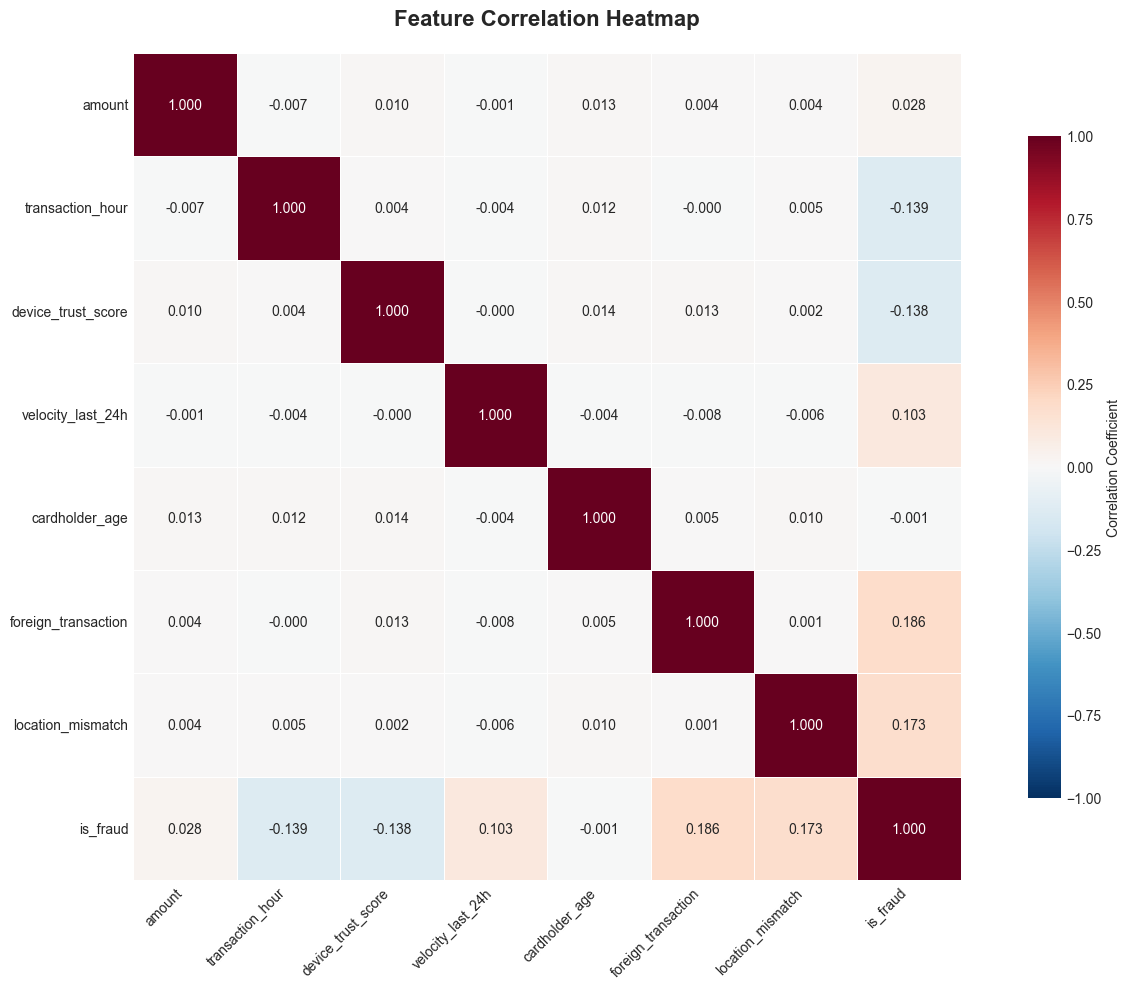

✓ Correlation heatmap generated


In [35]:
print("\n📊 Generating Correlation Heatmap...")

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(14, 10))

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=True,  # Show correlation values
            fmt='.3f',   # Format to 3 decimal places
            cmap='RdBu_r',  # Red-Blue colormap (reversed)
            center=0,    # Center colormap at 0
            square=True, # Make cells square
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            vmin=-1, vmax=1,
            ax=ax)

ax.set_title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)

# Rotate labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print("✓ Correlation heatmap generated")

## 5.3 Target Variable Correlation Bar Chart


📊 Generating Target Correlation Chart...


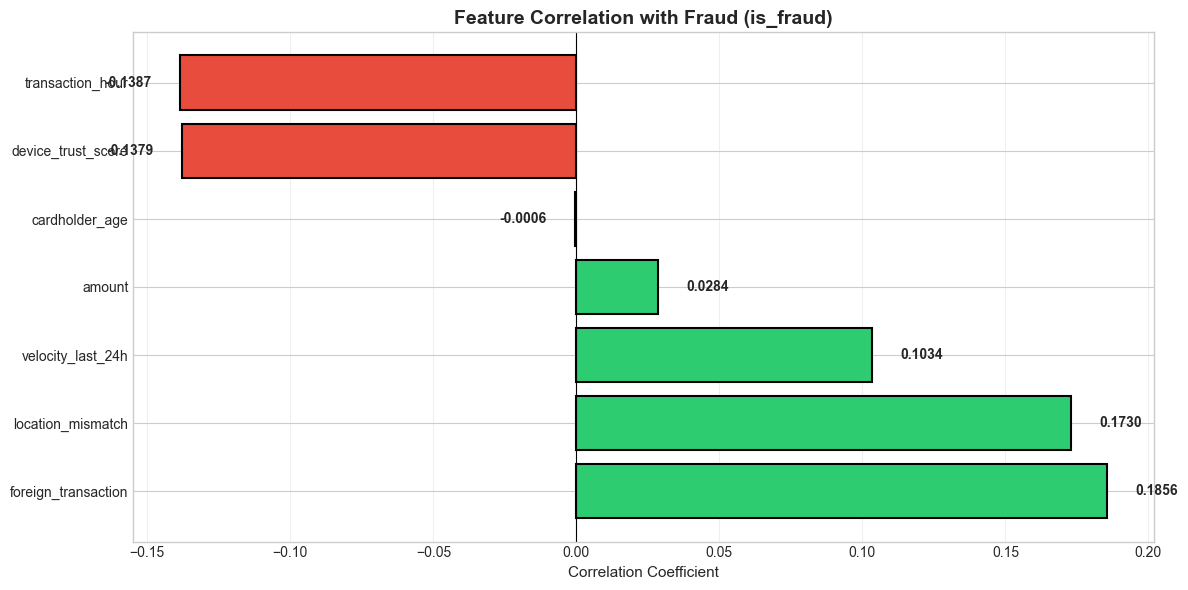

✓ Target correlation chart generated


In [36]:
print("\n📊 Generating Target Correlation Chart...")

# Create bar chart for target correlations
fig, ax = plt.subplots(figsize=(12, 6))

# Get correlations with target (excluding is_fraud itself)
target_corr_plot = target_corr.drop('is_fraud')

# Create color map based on correlation strength and direction
colors_corr = ['#e74c3c' if x < 0 else '#2ecc71' for x in target_corr_plot.values]

bars = ax.barh(range(len(target_corr_plot)), target_corr_plot.values, 
               color=colors_corr, edgecolor='black', linewidth=1.5)

ax.set_yticks(range(len(target_corr_plot)))
ax.set_yticklabels(target_corr_plot.index)
ax.set_xlabel('Correlation Coefficient', fontsize=11)
ax.set_title('Feature Correlation with Fraud (is_fraud)', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    label_x_pos = width + 0.01 if width >= 0 else width - 0.01
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2.,
            f'{width:.4f}',
            ha='left' if width >= 0 else 'right', 
            va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Target correlation chart generated")

## 5.4 Multicollinearity Check

In [37]:
print("\n" + "="*80)
print("5.4 MULTICOLLINEARITY CHECK")
print("="*80)

# Find high correlations between features (excluding diagonal and target)
high_corr_threshold = 0.7
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print(f"\n⚠ High Correlations Detected (|r| > {high_corr_threshold}):")
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print("\n" + high_corr_df.to_string(index=False))
    print("\n→ Consider feature selection or PCA to reduce multicollinearity")
else:
    print(f"\n✓ No high correlations found (all |r| <= {high_corr_threshold})")
    print("  → Low multicollinearity - Good for modeling")

print("\n" + "="*80)


5.4 MULTICOLLINEARITY CHECK

✓ No high correlations found (all |r| <= 0.7)
  → Low multicollinearity - Good for modeling



---
# 📊 FINAL SUMMARY

In [38]:
print("\n" + "="*80)
print("📊 ANALYSIS COMPLETE - SUMMARY")
print("="*80)

print("\n✅ All Analyses Completed:")
print("   1. ✓ Outlier Analysis with Boxplots & Histograms")
print("   2. ✓ Fraud vs Non-Fraud Distribution (Table + Graphs)")
print("   3. ✓ Merchant Category Distribution (Table + Graphs)")
print("   4. ✓ Foreign Transaction & Location Mismatch Analysis")
print("   5. ✓ Feature Correlation Heatmap & Tables")

print("\n📈 Key Findings:")
print(f"   • Total Transactions: {len(df):,}")
print(f"   • Fraud Rate: {df['is_fraud'].mean()*100:.2f}%")
print(f"   • Number of Categories: {df['merchant_category'].nunique()}")
print(f"   • Foreign Transactions: {(df['foreign_transaction'].sum()/len(df)*100):.2f}%")
print(f"   • Location Mismatches: {(df['location_mismatch'].sum()/len(df)*100):.2f}%")

# Top correlations with fraud
top_corr = target_corr.drop('is_fraud').abs().sort_values(ascending=False).head(3)
print("\n   Top 3 Fraud Predictors (by correlation):")
for i, (feature, corr) in enumerate(top_corr.items(), 1):
    print(f"      {i}. {feature}: {target_corr[feature]:.4f}")

print("\n" + "="*80)
print("🎉 READY FOR FEATURE ENGINEERING & MODELING!")
print("="*80)


📊 ANALYSIS COMPLETE - SUMMARY

✅ All Analyses Completed:
   1. ✓ Outlier Analysis with Boxplots & Histograms
   2. ✓ Fraud vs Non-Fraud Distribution (Table + Graphs)
   3. ✓ Merchant Category Distribution (Table + Graphs)
   4. ✓ Foreign Transaction & Location Mismatch Analysis
   5. ✓ Feature Correlation Heatmap & Tables

📈 Key Findings:
   • Total Transactions: 9,999
   • Fraud Rate: 1.51%
   • Number of Categories: 5
   • Foreign Transactions: 9.78%
   • Location Mismatches: 8.57%

   Top 3 Fraud Predictors (by correlation):
      1. foreign_transaction: 0.1856
      2. location_mismatch: 0.1730
      3. transaction_hour: -0.1387

🎉 READY FOR FEATURE ENGINEERING & MODELING!
